In [1]:
import pandas as pd
import numpy as np

In [2]:
data  = pd.read_csv('./Data/tvmarketing.csv')
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [19]:
def gradient_descent(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.01):
    N = float(len(y))
    for epoch in range(epochs):
        y_current = (m_current * X) + b_current
        cost = np.sum((y - y_current)**2) / N
        
        # Print the cost for monitoring
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")
        
        m_gradient = -(2/N) * np.sum(X * (y - y_current))
        b_gradient = -(2/N) * np.sum(y - y_current)
        m_current -= (learning_rate * m_gradient)
        b_current -= (learning_rate * b_gradient)
    return m_current, b_current

In [20]:
# Calculate the mean and standard deviation of the "TV" feature
mean_tv = data['TV'].mean()
std_tv = data['TV'].std()

# Standardize the "TV" feature
data['TV'] = (data['TV'] - mean_tv) / std_tv


X = data['TV'].values
y = data['Sales'].values

m, b = gradient_descent(X, y)

Epoch 0: Cost = 223.71625
Epoch 50: Cost = 38.81016065126903
Epoch 100: Cost = 14.268475910591802
Epoch 150: Cost = 11.011153123419382
Epoch 200: Cost = 10.578818004040286
Epoch 250: Cost = 10.521434963629071
Epoch 300: Cost = 10.513818560097976
Epoch 350: Cost = 10.512807633285766
Epoch 400: Cost = 10.512673451708393
Epoch 450: Cost = 10.512655641479213
Epoch 500: Cost = 10.512653277467686
Epoch 550: Cost = 10.51265296368197
Epoch 600: Cost = 10.512652922031469
Epoch 650: Cost = 10.512652916502923
Epoch 700: Cost = 10.512652915769076
Epoch 750: Cost = 10.512652915671666
Epoch 800: Cost = 10.512652915658737
Epoch 850: Cost = 10.51265291565702
Epoch 900: Cost = 10.512652915656792
Epoch 950: Cost = 10.51265291565676


In [21]:
predictions = (m * X + b) * std_tv + mean_tv
predictions

array([17.97077448,  9.14797403,  7.85022375, 14.23439455, 15.62721811,
        7.44616231,  9.76595036, 12.74649771,  7.44140865, 16.53041428,
       10.17476547, 17.23871022,  8.16396558, 11.66741597, 16.73482183,
       16.32125306, 10.25557775, 20.40940413, 10.32212905, 14.03474066,
       17.41459579, 18.31779196,  7.66007719, 17.88520853,  9.99412623,
       19.52997629, 13.82557944, 18.44614089, 18.85970966, 10.38868035,
       20.9560755 , 12.39948023, 11.65315498, 19.65832521, 11.58185002,
       20.85149489, 19.72012285, 10.58358057,  9.08142274, 17.87094754,
       16.65876321, 15.44657888, 20.98935114, 16.86792443,  8.22576321,
       15.35625926, 11.29663018, 18.43663356, 17.83291822, 10.21279478,
       16.53041428, 11.80527223, 17.31952251, 15.71278407, 19.52046896,
       16.4876313 ,  7.37961101, 13.50708395, 17.05331732, 17.04856366,
        9.5758038 , 19.45391766, 18.40811157, 11.9146065 , 13.26464709,
       10.31262172,  8.52999771, 13.65444754, 18.31779196, 17.33

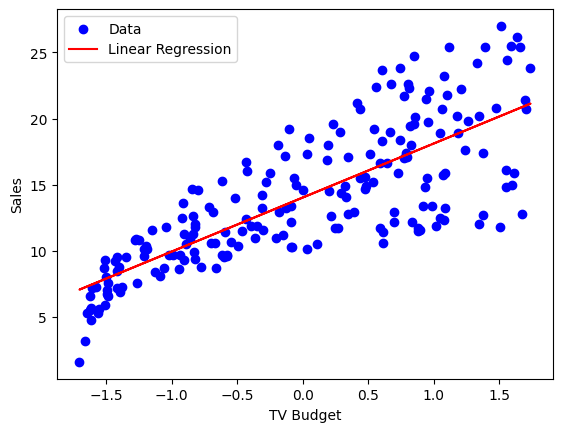

In [22]:
import matplotlib.pyplot as plt

plt.scatter(data['TV'], data['Sales'], color='blue', label='Data')
plt.plot(data['TV'], predictions, color='red', label='Linear Regression')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [23]:
new_tv_value = 250.0  # Replace with the value you want to predict

# Scale the new data point
new_data_point = (new_tv_value - mean_tv) / std_tv

# Make the prediction using the trained model
prediction = (m * new_data_point + b) * std_tv + mean_tv  # Scale the prediction back to original scale

In [24]:
print(f"Predicted Sales for TV budget of {new_tv_value}: {prediction}")

Predicted Sales for TV budget of 250.0: 1034.327988413122
